In [9]:

from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=500)

In [10]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split

In [11]:

#load and make the copy of Iris dataset to keep track of changes.
df = pd.read_csv('Iris.csv') #read comma seperated values
df_copy=df.copy() #copy dataset

In [12]:

#fetch first five rows from dataset
df_copy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:

#Remove unnecessary feat from dataset Id
df_copy.drop(columns=['Id'],axis=0,inplace=True)

In [14]:

#Check datatypes of each feat
df_copy.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [17]:
#check number of records and feilds present in dataset
df_copy.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 6


In [18]:
#see the descriptive statistics
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
df_copy.size

750

In [20]:

#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df_copy.columns = ['sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [22]:

df3_full=df_copy.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [23]:

df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,sl,sw,pl,pw,species,species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [24]:

df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column

In [25]:

#final dataframe
df3_full
     

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
df3_full.shape #check propertise like shape

(150, 5)

In [27]:
#check for missing entries
df3_full.isna() 

,sl,sw,pl,pw,species1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [28]:
#In each feat,count of missing entries
df3_full.isna().sum()

sl          0
sw          0
pl          0
pw          0
species1    0
dtype: int64

In [29]:

df3_full.corr() # check the correlation matrix

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_7980\105456513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3_full.corr() # check the correlation matrix


,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [30]:
#statistical description of numerical  data only
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:

#categoriwise frequency of data
df3_full.species1.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species1, dtype: int64

<Axes: xlabel='species1', ylabel='sl'>

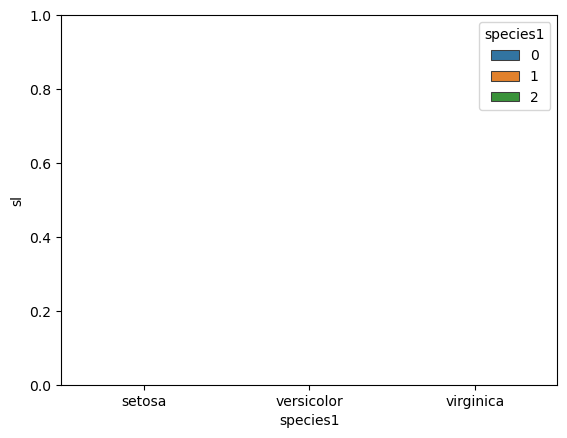

In [32]:
sns.boxplot(x=df3_full.species1,y=df3_full.sl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='sw'>

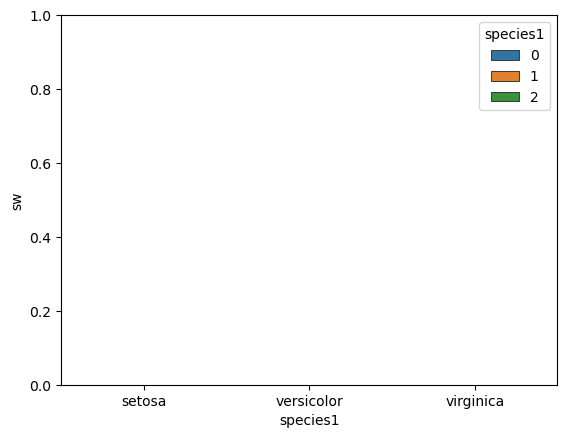

In [33]:
sns.boxplot(x=df3_full.species1,y=df3_full.sw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='pl'>

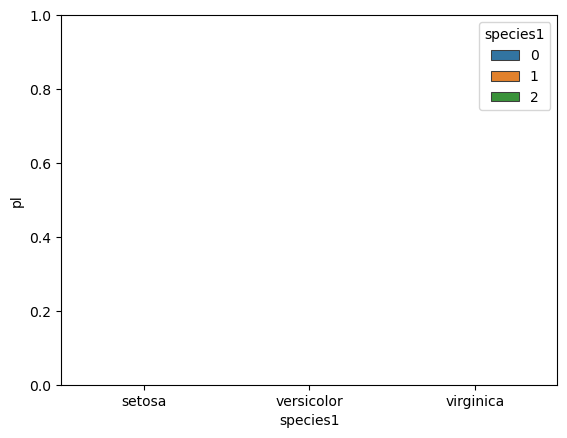

In [34]:

sns.boxplot(x=df3_full.species1,y=df3_full.pl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='pw'>

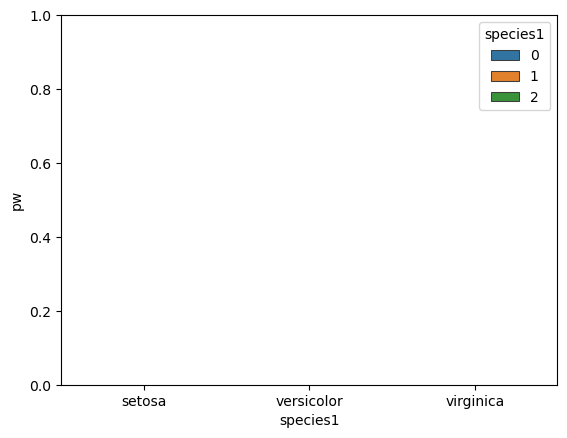

In [35]:
sns.boxplot(x=df3_full.species1,y=df3_full.pw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='sl', ylabel='pl'>

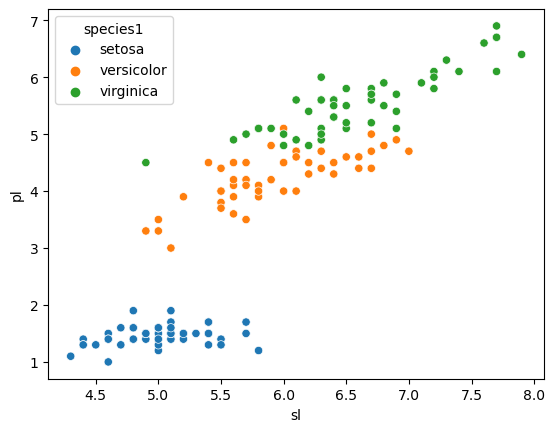

In [36]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pl,hue=df3_full.species1)

<Axes: xlabel='pl', ylabel='pw'>

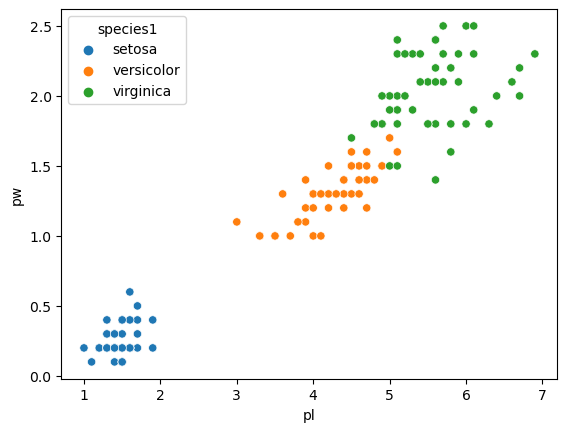

In [37]:

sns.scatterplot(x=df3_full.pl,y=df3_full.pw,hue=df3_full.species1)

<Axes: xlabel='sl', ylabel='pw'>

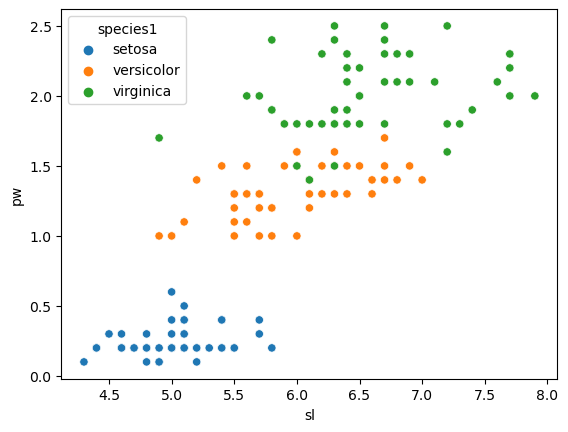

In [38]:

sns.scatterplot(x=df3_full.sl,y=df3_full.pw,hue=df3_full.species1)

In [39]:
df3_full.columns # check column names

Index(['sl', 'sw', 'pl', 'pw', 'species1'], dtype='object')

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_7980\2461735562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.pl)


<Axes: xlabel='pl', ylabel='Density'>

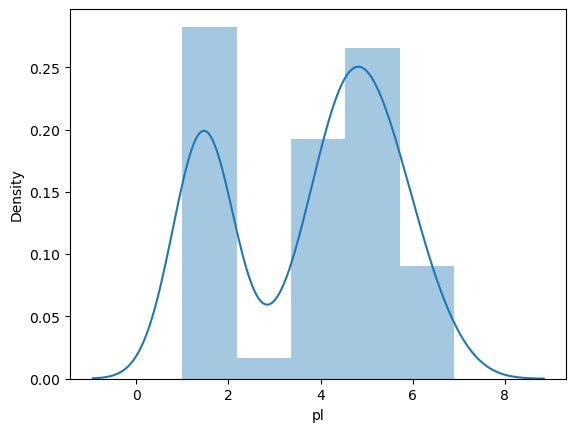

In [40]:

sns.distplot(df3_full.pl)

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_7980\437811181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.sl)


<Axes: xlabel='sl', ylabel='Density'>

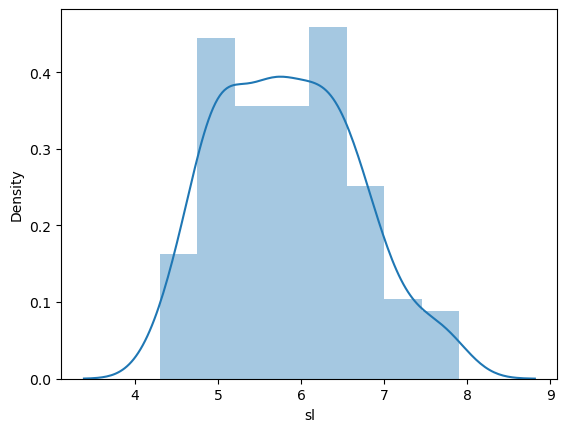

In [41]:
sns.distplot(df3_full.sl)

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_7980\370837299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.sw)


<Axes: xlabel='sw', ylabel='Density'>

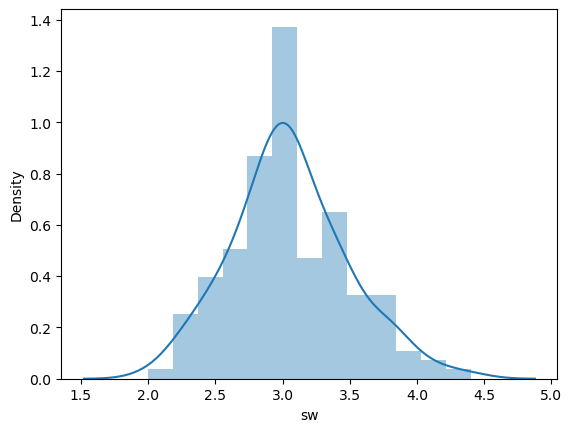

In [42]:
sns.distplot(df3_full.sw)

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_7980\1032795834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.pw)


<Axes: xlabel='pw', ylabel='Density'>

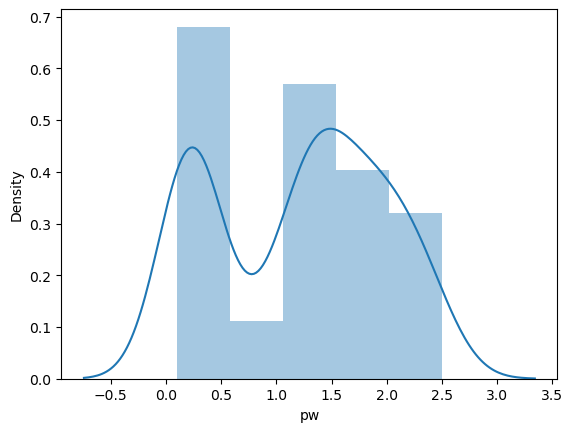

In [43]:

sns.distplot(df3_full.pw)

<Axes: xlabel='species1', ylabel='sw'>

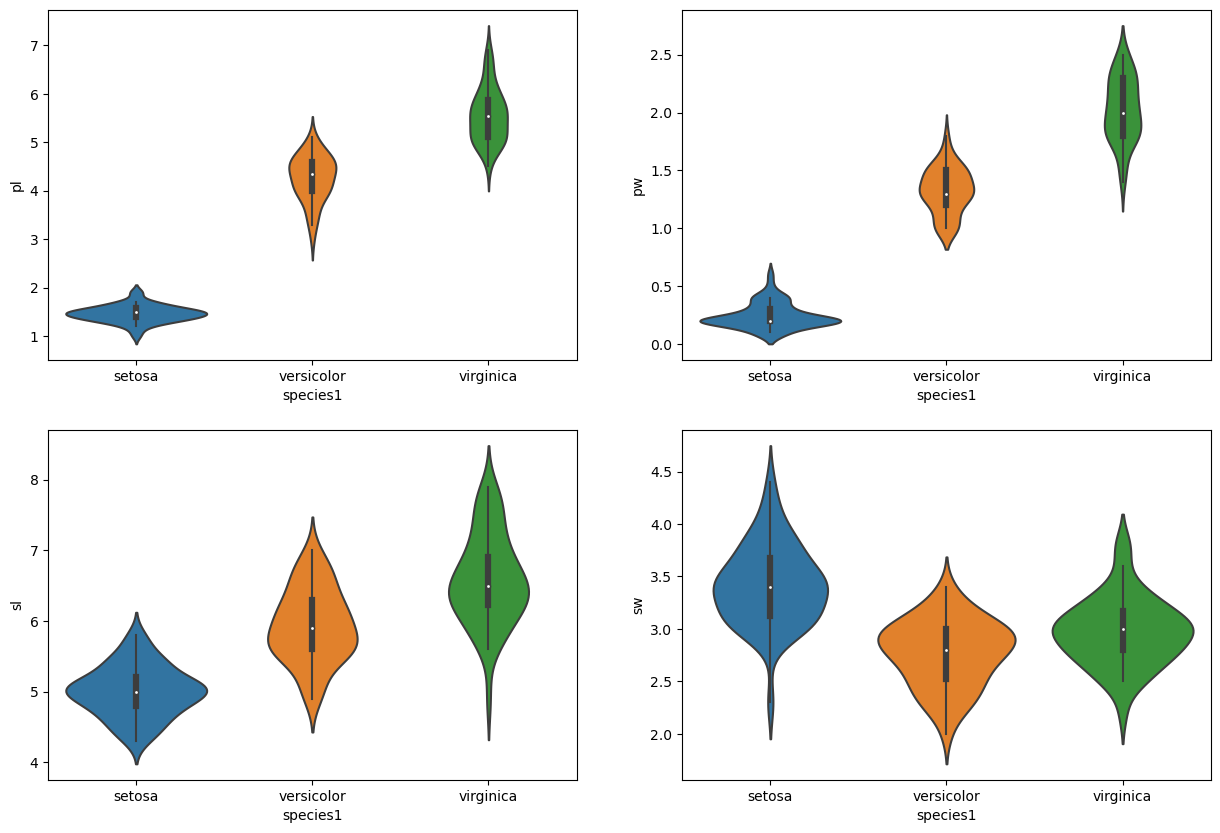

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_7980\1479841762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3_full.corr(),annot=True,cmap='cubehelix_r')


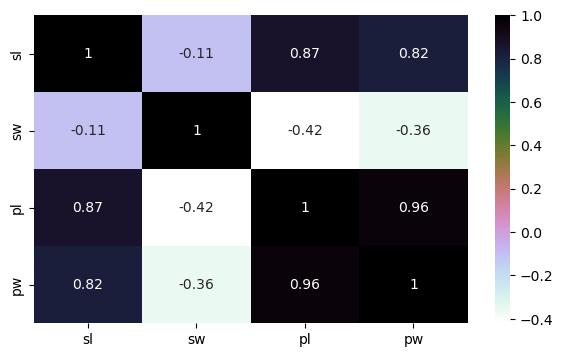

In [45]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df3_full.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [46]:

from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
le.fit_transform(df3_full['species1'])
df3_full['species1']=le.fit_transform(df3_full['species1'])
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [47]:
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:

x = df3_full.iloc[:,:-1]
x

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:

y = df3_full.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species1, Length: 150, dtype: int32

In [50]:

df3_full.species1.unique()

array([0, 1, 2])

In [51]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=20)

In [52]:

xtrain.shape

(105, 4)

In [53]:
ytrain.shape

(105,)

In [54]:

xtest.shape

(45, 4)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logi = LogisticRegression()
logi.fit(xtrain,ytrain)
logi_prediction = logi.predict(xtest)
logi_prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [56]:
print(logi.score(xtrain,ytrain)*100)
print(logi.score(xtest,ytest)*100)

97.14285714285714
93.33333333333333


In [57]:


accuracy_score(ytest,logi_prediction)*100

93.33333333333333

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:

para = {'penalty':['l1','l2','elasticnet'],
        'C':[1,2,3,4,5,6,10,20,30,40,50,1.5,2.3,1.6,1.9],
        'max_iter':[100,200,300,50,70,60,50]
        }

In [60]:
classifier_logistic = GridSearchCV(logi,param_grid = para,scoring='accuracy',cv=5)

In [61]:
classifier_logistic.fit(xtrain,ytrain)

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.95238095        nan        nan 0.95238095        nan
        nan 0.95238095        nan        nan 0.95238095        nan
        nan 0.95238095        nan        nan 0.95238095        nan
        nan 0.95238095        nan        nan 0.96190476        nan
        nan 0.96190476        nan        nan 0.96190476        nan
        nan 0.96190476        nan        nan 0.95238095        nan
        nan 0.96190476        nan        nan 0.96190476        nan
        nan 0.96190476        nan        nan 0.96190476        nan
        nan 0.96190476        nan        nan 0.94285714        nan
        nan 0.96190476        nan        nan 0.96190476        nan
        nan 0.94285714        nan        nan 0.96190476        nan
        nan 0.96190476        nan        nan 0.96190476        nan
        nan 0.95238095        nan        nan 0.9619

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 1.5, 2.3,
                               1.6, 1.9],
                         'max_iter': [100, 200, 300, 50, 70, 60, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [62]:
classifier_logistic.best_estimator_

LogisticRegression(C=20, max_iter=50)

In [63]:

classifier_logistic.best_params_

{'C': 20, 'max_iter': 50, 'penalty': 'l2'}

In [64]:
classifier_logistic.best_score_



0.9714285714285715

In [65]:

prediction = classifier_logistic.predict(xtest)
prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

In [66]:
from sklearn.metrics import accuracy_score,classification_report
grid_logi_accuracy_score1 = accuracy_score(ytest,prediction)
grid_logi_accuracy_score1=(np.round(grid_logi_accuracy_score1*100))
grid_logi_accuracy_score1

91.0

In [67]:
confusion_matrix(ytest,prediction)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  4, 10]], dtype=int64)

In [68]:
class_pre_rec = classification_report(ytest,prediction)
print(class_pre_rec)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



In [69]:

from sklearn.tree import DecisionTreeClassifier

In [70]:
tree_classifier = DecisionTreeClassifier(criterion='gini',
    splitter='best', 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    random_state=1,
    max_leaf_nodes=2,
    class_weight='balanced',
    ccp_alpha=0.01,)

In [72]:
tree_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features=1, max_leaf_nodes=2, random_state=1)

In [73]:
tree_classifier.score(xtrain,ytrain)

0.6571428571428571

In [74]:

tree_classifier.score(xtest,ytest)
     

0.6888888888888889

In [75]:

tree_classifier.score(xtest,ytest)
     

0.6888888888888889

In [76]:
tree_pred=tree_classifier.predict(xtest)

In [77]:

from sklearn.metrics import confusion_matrix,classification_report

In [78]:
confusion_matrix(ytest,tree_pred)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0, 14,  0]], dtype=int64)

In [79]:
print(classification_report(ytest,tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.52      0.67      0.57        45
weighted avg       0.51      0.69      0.58        45



C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:

import sklearn
     

In [82]:

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [83]:

param_dict = {"criterion":['gini','entropy'],"max_depth":[1,2,3,4,5,6,7,None]}

In [84]:

from sklearn.model_selection import GridSearchCV

In [85]:
grid = GridSearchCV(tree_classifier,param_grid=param_dict,n_jobs=-1)
grid

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [86]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [87]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [88]:
grid.best_score_

0.6761904761904761

In [89]:
grid_pred2=grid.predict(xtest)

In [90]:

accuracy_score(ytest,grid_pred2)*100

68.88888888888889

In [91]:

from sklearn.metrics import confusion_matrix,classification_report

In [92]:
confusion_matrix(ytest,grid_pred2)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0, 14,  0]], dtype=int64)

In [93]:

print(classification_report(ytest,grid_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.52      0.67      0.57        45
weighted avg       0.51      0.69      0.58        45



C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWAROOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)

In [96]:

knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [97]:

knn.score(xtrain,ytrain)

0.9809523809523809

In [98]:
knn.score(xtest,ytest)

0.9555555555555556

In [99]:

knn_pred=knn.predict(xtest)

In [100]:
accuracy_score(ytest,knn_pred)

0.9555555555555556

In [101]:
confusion_matrix(ytest,knn_pred)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 13]], dtype=int64)

In [102]:

accuracy_score(ytest,knn_pred)

0.9555555555555556

In [103]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RFC=RandomForestClassifier(n_estimators=300,criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=2,
    min_impurity_decrease=0.1,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=1,
    ccp_alpha=0.01,
    max_samples=3)

In [106]:

RFC.fit(xtrain,ytrain)

RandomForestClassifier(ccp_alpha=0.01, max_depth=17, max_leaf_nodes=2,
                       max_samples=3, min_impurity_decrease=0.1,
                       n_estimators=300, n_jobs=-1, random_state=1)

In [107]:
RFC.score(xtrain,ytrain)

0.9333333333333333

In [108]:
RFC.score(xtest,ytest)

0.7777777777777778

In [109]:

RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'max_samples': 3,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [110]:
RFC_pred = RFC.predict(xtest)

In [111]:
accuracy_score(ytest,RFC_pred)

0.7777777777777778

In [112]:
confusion_matrix(ytest,RFC_pred)

array([[13,  0,  0],
       [ 0, 10,  8],
       [ 0,  2, 12]], dtype=int64)

In [113]:
print(classification_report(ytest,RFC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.56      0.67        18
           2       0.60      0.86      0.71        14

    accuracy                           0.78        45
   macro avg       0.81      0.80      0.79        45
weighted avg       0.81      0.78      0.78        45



In [114]:
import xgboost as xg

In [115]:
xg_model = xg.XGBClassifier(gamma=0.01,
              learning_rate=0.01, max_bin=4,
              max_depth=15,
              max_leaves=2, min_child_weight=2,n_estimators=300, n_jobs=-1,objective='multi:softprob',
             random_state=1)

In [116]:
xg_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=4,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [117]:

xg_model.score(xtrain,ytrain)

0.9904761904761905

In [118]:
xg_model.score(xtest,ytest)

0.8888888888888888

In [119]:
xg_pred =xg_model.predict(xtest)

In [120]:

accuracy_score(ytest,xg_pred)

0.8888888888888888

In [121]:

confusion_matrix(ytest,xg_pred)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  5,  9]], dtype=int64)

In [122]:
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      1.00      0.88        18
           2       1.00      0.64      0.78        14

    accuracy                           0.89        45
   macro avg       0.93      0.88      0.89        45
weighted avg       0.91      0.89      0.88        45

